# EN.553.436/636 Exam 2 (25 pts.)
## Guidelines
- Complete the exam within a 75-minute time interval between 7AM and 9PM.
- Your start time begins when you begin reading the exam.
- Upload your IPYNB and PDF to Gradescope before 9PM.
- <font color='red'>Make sure all code and comments are visible in your PDF. Use line breaks if necessary. Make sure your problems are marked in Gradescope. Make sure your submission has normal page breaks and is not one long page. Failure to follow these guidelines may result in your problems not being graded.</font>
- Write your start and end times below.

## Start Time:
## End Time:

## The Dataset

Throughout this exam, we will analyze the following artifical dataset with two clusters. Run the cell below.

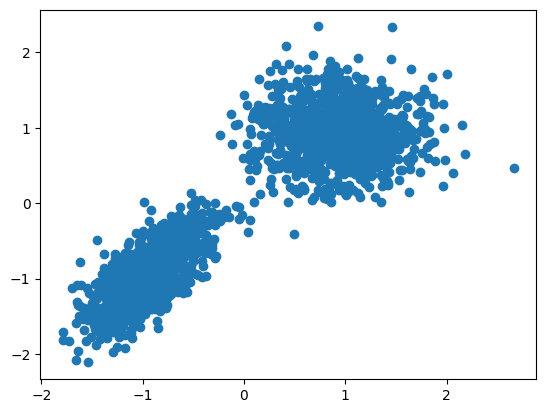

(2000, 2)


In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('ex2.csv')
X = np.array(data.iloc[:,:2]) 
c = np.array(data.iloc[:,2])

plt.scatter(X[:,0], X[:,1])
plt.show()
print(X.shape)

## 1 (10 pts.)
Run the following code, which attempts to perform clustering on the dataset. Note that the code contains a mistake on exactly one line.

### 1.1 (5 pts.)
State the name of the method being implemented, and comment on the indicated lines to explain the purpose of the code blocks. 

### 1.2 (5 pts.)
Correct the one wrong line of code. Place an explanatory comment next to your correction.

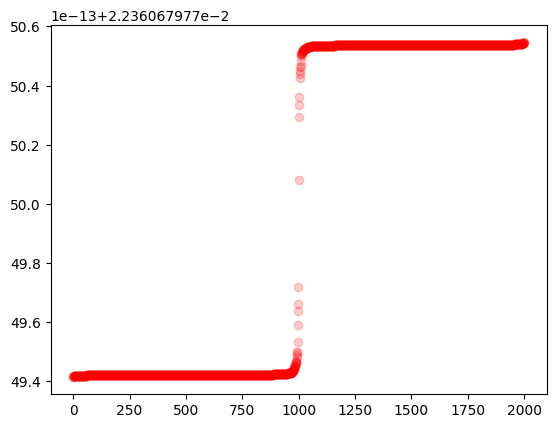

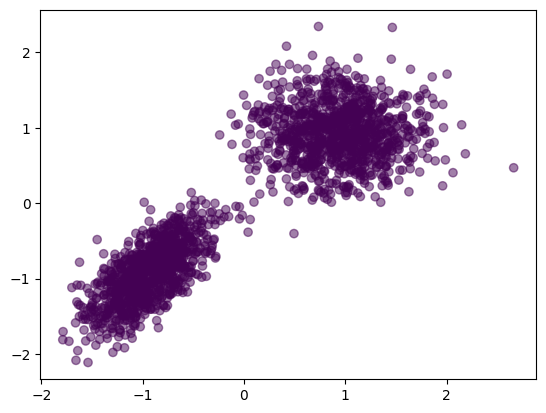

In [36]:
# NAME OF THE METHOD BEING IMPLEMENTED: Spectral Embedding

# COMMENT HERE.
temp_1 = X[np.newaxis, :, :]
temp_2 = X[:, np.newaxis, :]
dif = temp_1 - temp_2
dif_sq = dif * dif
dist = np.sqrt(dif_sq.sum(axis=2))


# COMMENT HERE.
adj = (dist<0.7)
np.fill_diagonal(adj, False)
adj = adj.astype(np.float64)

# COMMENT HERE.
deg = adj.sum(axis=0)
deg = np.diag(deg)
lap = deg - adj

# COMMENT HERE.
_, vec = np.linalg.eigh(lap)
ind = 0
plt.plot(np.sort(vec[:,ind]), 'ro', alpha=0.2)
plt.show()

# COMMENT HERE.
thresh = 0
c = (vec[:,ind] < thresh).astype(int)
plt.scatter(X[:,0], X[:,1], c=c, alpha=0.5)
plt.show()

## 2 (10 pts.)
Run the following code, which attempts to perform clustering on dataset using another method. Note that the code contains an omission in exactly one block.

### 2.1 (5 pts.)
State the name of the method being implemented, and comment on the indicated lines to explain the purpose of the code blocks. 

### 2.2 (5 pts.)
Complete the missing code in exactly one block. Place an explanatory comment next to your correction. Do not change any existing lines of code, and do not add code to more than one block. It is possible to complete this part by writing exactly one line, but you are free to write multiple lines.

0


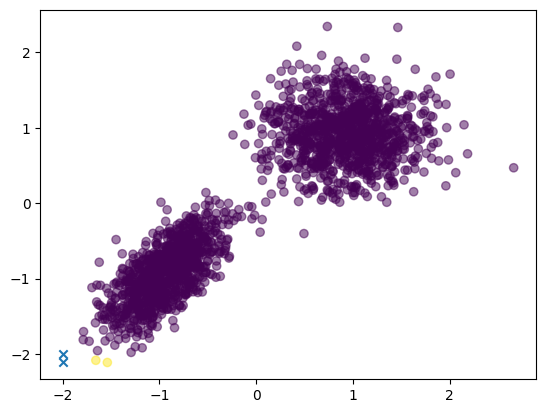

1


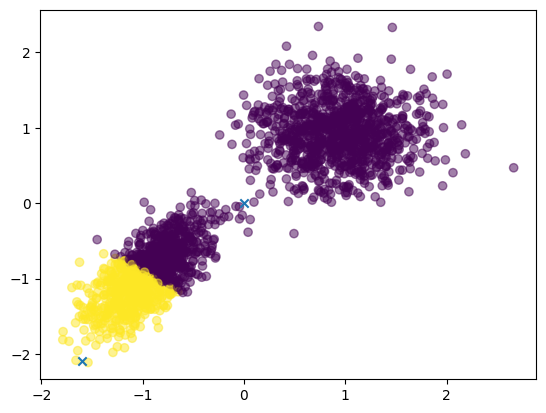

2


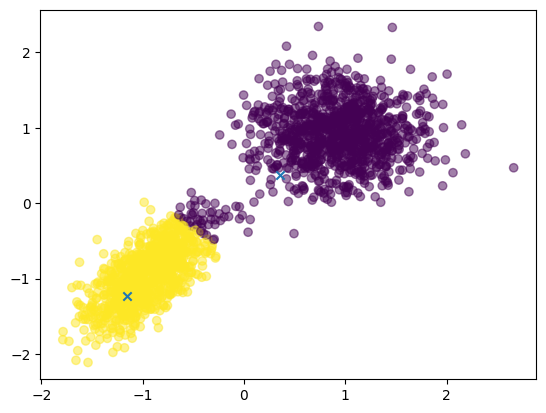

3


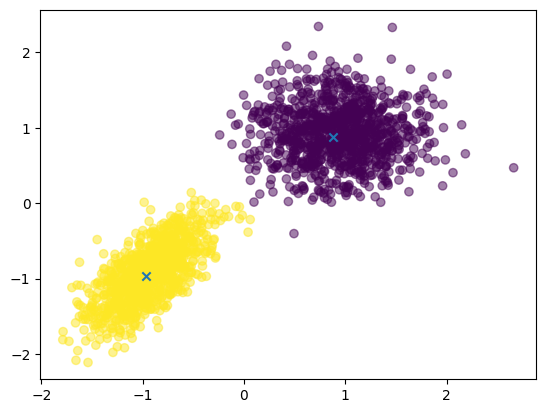

4


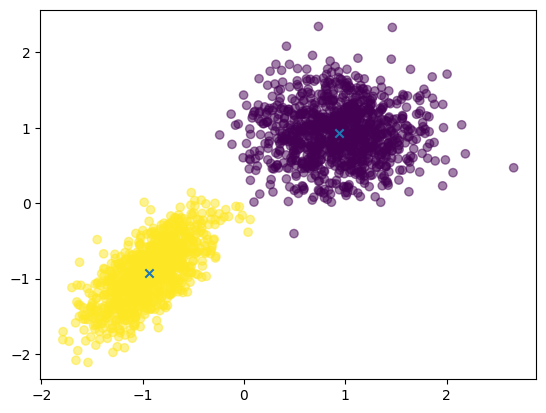

In [37]:
# NAME OF THE METHOD BEING IMPLEMENTED: KMean Clustering

# COMMENT HERE.
#Assigns starting centers of each cluster
cen = np.array([[-2,-2.1], [-2,-2]])

for n_iter in range(10):
    print(n_iter)
    clus0 = []
    clus1 = []
    
    for i in range(X.shape[0]):
        # COMMENT HERE.
        #calculates distance of point from each cluster center
        d0 = np.linalg.norm(X[i,:] - cen[0,:])
        d1 = np.linalg.norm(X[i,:] - cen[1,:])
        
        # COMMENT HERE.
        #assigns this point to the cluster it is closer to
        if  d0 < d1:
            clus0.append(i)
        else:
            clus1.append(i)
    
    # COMMENT HERE.
    # visualizes what cluster each point is in 
    c = np.isin(np.arange(X.shape[0]), clus0)
    plt.scatter(X[:,0], X[:,1], c=c, alpha=0.5)
    plt.scatter(cen[:,0], cen[:,1], marker='x')
    plt.show()
    
    # COMMENT HERE.
    # sets 
    prev_cen = cen
    cen = np.array([np.mean(X[clus0,:], axis=0), 
                    np.mean(X[clus1,:], axis=0)])
    
    # COMMENT HERE.
    if np.linalg.norm(prev_cen - cen) < 1e-3:
        break

## 3 (5 pts.)
The dataset appears to consist of two Gaussian clusters. Assume this is true, and print estimates of the Gaussian cluster mean vectors and covariance matrices. You may import any package used in class.

In [38]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(X)
print(gmm.means_[0])
print(gmm.means_[1])
print(gmm.covariances_[0])
print(gmm.covariances_[1])

[-0.93396288 -0.92414201]
[0.93423541 0.92441168]
[[0.08803897 0.07837624]
 [0.07837624 0.14526971]]
[[0.16689214 0.00052023]
 [0.00052023 0.14615709]]


## 4 (10 pts.)
The previous sections treated X as unlabeled data for clustering. In this problem we will use the provided labels to perform classification

1. First, split the data into 80% training and 20% testing. 
2. Then, using only the training data, train a linear discriminant analysis classifier, gaussian naive bayes classifier, decision tree classifier (with depth 3), and random forest classifier (with depth 3 and 16 estimators). 
3. Evaluate the training and test accuracy for each method.

In [39]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split

data = pd.read_csv('music_scaled.csv')
data_turkey = data[data['Country'] == 'Turkey']
data_india = data[data['Country'] == 'India']
data = pd.concat([data_turkey, data_india])

X = np.array(data.iloc[:, 0:68].values)
c = np.array(data['Country'].map({'Turkey': 0, 'India': 1}))
inds = np.random.permutation(len(X))
X = X[inds]
c = c[inds]

print(X.shape)
print(X)
print(c.shape)
print(c)

(133, 68)
[[ 0.05971374  0.11019853 -0.3943186  ... -0.10492461  1.86059724
   1.03614406]
 [-0.43452888 -0.01110125 -0.43376311 ... -0.56747889 -0.36049098
  -0.17563351]
 [-0.02616656 -0.0582456  -0.4591294  ...  1.60028319  0.19674108
   0.6495081 ]
 ...
 [-0.31181207 -0.33002642 -0.5856081  ... -0.96235843 -0.30261842
  -0.81710356]
 [ 1.74260482  1.50409339  0.17570765 ... -0.20558344 -0.71927809
  -0.45756138]
 [ 0.38694945  0.5578025  -0.06542791 ... -0.31797572 -0.44294144
  -0.2751744 ]]
(133,)
[1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0
 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0]


In [40]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, c, test_size=0.2, random_state=0)
lda = LDA()
lda.fit(X_train, y_train)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
dclf = DecisionTreeClassifier(max_depth=3, random_state=0)
dclf.fit(X_train, y_train)
rclf = RandomForestClassifier(n_estimators=16, max_depth=3, random_state=0)
rclf.fit(X_train, y_train)

y_pred_train_lda= gnb.predict(X_train)
y_pred_test_lda= gnb.predict(X_test)
y_pred_train_gnb= gnb.predict(X_train)
y_pred_test_gnb= gnb.predict(X_test)
y_pred_train_dclf= gnb.predict(X_train)
y_pred_test_dclf= gnb.predict(X_test)
y_pred_train_rclf= gnb.predict(X_train)
y_pred_test_rclf= gnb.predict(X_test)


print("training accuracies")
print(lda.score(X_train, y_train))
print(gnb.score(X_train, y_train))
print(dclf.score(X_train, y_train))
print(rclf.score(X_train, y_train))

print("test accuracies")
print(lda.score(X_test, y_test))
print(gnb.score(X_test, y_test))
print(dclf.score(X_test, y_test))
print(rclf.score(X_test, y_test))


# NAME OF THE METHOD BEING IMPLEMENTED: Linear discriminant analysis.
lda = LDA().fit(X_train, y_train)
print('LDA')
print('Training accuracy: ', lda.score(X_train, y_train))
print('Test accuracy    : ', lda.score(X_test, y_test))

# NAME OF THE METHOD BEING IMPLEMENTED: Gaussian naive bayes.
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
print('\nGaussian naive bayes')
print('Training accuracy: ', gnb.score(X_train, y_train))
print('Test accuracy    : ', gnb.score(X_test, y_test))

# NAME OF THE METHOD BEING IMPLEMENTED: Decision tree.
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=0).fit(X_train, y_train)
print('\nDecision tree')
print('Training accuracy: ', dt.score(X_train, y_train))
print('Test accuracy    : ', dt.score(X_test, y_test))

# NAME OF THE METHOD BEING IMPLEMENTED: Random forest.
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=3, n_estimators=16, random_state=0).fit(X_train, y_train)
print('\nRandom forest')
print('Training accuracy: ', rf.score(X_train, y_train))
print('Test accuracy    : ', rf.score(X_test, y_test))


training accuracies
0.9811320754716981
0.8018867924528302
0.9245283018867925
0.9622641509433962
test accuracies
0.6296296296296297
0.6296296296296297
0.7777777777777778
0.7407407407407407
LDA
Training accuracy:  0.9811320754716981
Test accuracy    :  0.6296296296296297

Gaussian naive bayes
Training accuracy:  0.8018867924528302
Test accuracy    :  0.6296296296296297

Decision tree
Training accuracy:  0.9245283018867925
Test accuracy    :  0.7777777777777778

Random forest
Training accuracy:  0.9622641509433962
Test accuracy    :  0.7407407407407407


4. Which method has the best performance based on the highest test accuracy?

    **Ans:** LDA